## FIRST PROTOTYPE

In [ ]:
def rotating_showers_bruno(txt_path,length_triangle,a,b,allowed_particles,max_bias,x_lim=None,y_lim=None):
    all_particles_df=txt_to_df(txt_path,inclined=False)
    if (x_lim is not None and y_lim is not None):
        all_particles_df_limited = txt_to_df(txt_path, x_lim, y_lim, inclined=False)
    else:
        all_particles_df_limited = None

    x_bias,y_bias=create_bias(max_bias)
    all_particles_df['x']=all_particles_df['x'] + x_bias
    all_particles_df['y']=all_particles_df['y'] + y_bias

    base = all_particles_df.copy()

    theta = np.deg2rad(90)
    R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

    df_det00,df_det10,df_det20,df_det30=filter_geometry(all_particles_df,allowed_particles,length_triangle,a,b)
    df_det00,df_det10,df_det20,df_det30=reset_time(df_det00,df_det10,df_det20,df_det30)
    shower_info=get_shower_info(txt_path)

    base[['x','y']] = (R @ base[['x','y']].T).T
    df_det01,df_det11,df_det21,df_det31=filter_geometry(base,allowed_particles,length_triangle,a,b)
    df_det01,df_det11,df_det21,df_det31=reset_time(df_det01,df_det11,df_det21,df_det31)

    base[['x','y']] = (R @ base[['x','y']].T).T
    df_det02,df_det12,df_det22,df_det32=filter_geometry(base,allowed_particles,length_triangle,a,b)
    df_det02,df_det12,df_det22,df_det32=reset_time(df_det02,df_det12,df_det22,df_det32)

    base[['x','y']] = (R @ base[['x','y']].T).T
    df_det03,df_det13,df_det23,df_det33=filter_geometry(base,allowed_particles,length_triangle,a,b)
    df_det03,df_det13,df_det23,df_det33=reset_time(df_det03,df_det13,df_det23,df_det33)
    
    df_det0 = pd.concat([df_det00,df_det01,df_det02,df_det03])
    df_det1 = pd.concat([df_det10,df_det11,df_det12,df_det13])
    df_det2 = pd.concat([df_det20,df_det21,df_det22,df_det23])
    df_det3 = pd.concat([df_det30,df_det31,df_det32,df_det33])

    return shower_info,df_det1,df_det2,df_det3,df_det0,all_particles_df_limited

## PROCESSING THE ROTATED DETECTED DATA

In [5]:
import pickle
with open(r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\100k Showers\oct24_100k_50.0m_.pickle",'rb') as f:
    original = pickle.load(f)

In [6]:
print(len([(dic,df1,df2,df3,df0) for dic,df1,df2,df3,df0 in original 
           if sum(len(d) for d in (df1,df2,df3,df0))>0]))

18319


In [1]:
import pickle
with open(r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\ROTATED_NEW100K_50.0m_.pickle",'rb') as f:
    data = pickle.load(f)

In [2]:
import pandas as pd
reduced_data = [(dic, df1.drop(columns=['rotation_rad','phi']), df2.drop(columns=['rotation_rad','phi']), 
                 df3.drop(columns=['rotation_rad','phi']), df0.drop(columns=['rotation_rad','phi'])) 
                for dic,df1,df2,df3,df0 in data 
                if len(df1) !=0 or len(df2) !=0 or len(df3)  !=0 or len(df0) !=0]
print(len(data))
print(len(reduced_data))

102064
32384


In [3]:
keep_0 = {'PRMPAR', 'PRME','THETAP','PHIP'}
dt_phi0 = [({k: dic[k] for k in keep_0 if k in dic},df1[df1['rot_idx'] == 0],df2[df2['rot_idx'] == 0],
            df3[df3['rot_idx'] == 0],df0[df0['rot_idx'] == 0]) 
           for dic,df1,df2,df3,df0 in reduced_data]

keep_1 = {'PRMPAR', 'PRME','THETAP','phi_1'}
dt_phi1 = [({k: dic[k] for k in keep_1 if k in dic},df1[df1['rot_idx'] == 1],df2[df2['rot_idx'] == 1],
            df3[df3['rot_idx'] == 1],df0[df0['rot_idx'] == 1]) 
           for dic,df1,df2,df3,df0 in reduced_data]

keep_2 = {'PRMPAR', 'PRME','THETAP','phi_2'}
dt_phi2 = [({k: dic[k] for k in keep_2 if k in dic},df1[df1['rot_idx'] == 2],df2[df2['rot_idx'] == 2],
            df3[df3['rot_idx'] == 2],df0[df0['rot_idx'] == 2]) 
           for dic,df1,df2,df3,df0 in reduced_data]

keep_3 = {'PRMPAR', 'PRME','THETAP','phi_3'}
dt_phi3 = [({k: dic[k] for k in keep_3 if k in dic},df1[df1['rot_idx'] == 3],df2[df2['rot_idx'] == 3],
            df3[df3['rot_idx'] == 3],df0[df0['rot_idx'] == 3]) 
           for dic,df1,df2,df3,df0 in reduced_data]

print(len(dt_phi0))
print(len(dt_phi1))
print(len(dt_phi2))
print(len(dt_phi3))

32384
32384
32384
32384


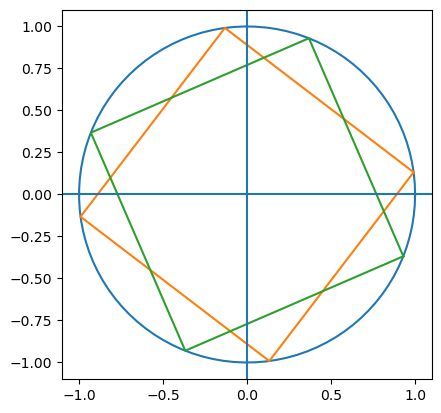

In [9]:
import matplotlib.pyplot as plt
import numpy as np

p00 = dt_phi0[100][0]['PHIP']
p01 = dt_phi1[100][0]['phi_1']
p02 = dt_phi2[100][0]['phi_2']
p03 = dt_phi3[100][0]['phi_3']

p10 = dt_phi0[99][0]['PHIP']
p11 = dt_phi1[99][0]['phi_1']
p12 = dt_phi2[99][0]['phi_2']
p13 = dt_phi3[99][0]['phi_3']

x0 = [np.cos(p00),np.cos(p01),np.cos(p02),np.cos(p03),np.cos(p00)]
y0 = [np.sin(p00),np.sin(p01),np.sin(p02),np.sin(p03),np.sin(p00)]
x1 = [np.cos(p10),np.cos(p11),np.cos(p12),np.cos(p13),np.cos(p10)]
y1 = [np.sin(p10),np.sin(p11),np.sin(p12),np.sin(p13),np.sin(p10)]
plt.plot(np.cos(np.linspace(0,2*np.pi,100)),np.sin(np.linspace(0,2*np.pi,100)))
plt.gca().set_aspect('equal', 'box')
plt.plot(x0,y0)
plt.plot(x1,y1)
plt.axvline(0)
plt.axhline(0)
plt.show()

In [4]:
dt_phi0[:] = [(dic, d1, d2, d3, d0) for (dic, d1, d2, d3, d0) in dt_phi0
    if sum(len(d) for d in (d1, d2, d3, d0)) >= 3]
dt_phi1[:] = [(dic, d1, d2, d3, d0) for (dic, d1, d2, d3, d0) in dt_phi1
    if sum(len(d) for d in (d1, d2, d3, d0)) >= 3]
dt_phi2[:] = [(dic, d1, d2, d3, d0) for (dic, d1, d2, d3, d0) in dt_phi2
    if sum(len(d) for d in (d1, d2, d3, d0)) >= 3]
dt_phi3[:] = [(dic, d1, d2, d3, d0) for (dic, d1, d2, d3, d0) in dt_phi3
    if sum(len(d) for d in (d1, d2, d3, d0)) >= 3]

print(len(dt_phi0))
print(len(dt_phi1))
print(len(dt_phi2))
print(len(dt_phi3))

6739
6809
6872
6768


In [5]:
n = int(input("SHOWER: "))
print("_____________Rotation 0______________")
for i in range(0,5):
    print(dt_phi0[n][i])
print("\n")

print("_____________Rotation 1______________")
for i in range(0,5):
    print(dt_phi1[n][i])
print("\n")

print("_____________Rotation 2______________")
for i in range(0,5):
    print(dt_phi2[n][i])
print("\n")

print("_____________Rotation 3______________")
for i in range(0,5):
    print(dt_phi3[n][i])

SHOWER:  50


_____________Rotation 0______________
{'THETAP': 0.430126, 'PHIP': -0.223935, 'PRME': 11496.3, 'PRMPAR': 14}
Empty DataFrame
Columns: [id, t, Detector, x, y, ek, rot_idx]
Index: []
   id    t  Detector          x          y        ek  rot_idx
0   2  0.0       2.0 -25.419017 -14.541057  0.035787        0
1   2  1.2       2.0 -24.322817 -14.176587  0.033541        0
   id     t  Detector          x          y        ek  rot_idx
0   2  75.7       3.0  25.921483 -14.548827  0.083865        0
Empty DataFrame
Columns: [id, t, Detector, x, y, ek, rot_idx]
Index: []


_____________Rotation 1______________
{'THETAP': 0.668464, 'PRME': 12089.6, 'PRMPAR': 14, 'phi_1': np.float64(2.9759663267948966)}
Empty DataFrame
Columns: [id, t, Detector, x, y, ek, rot_idx]
Index: []
Empty DataFrame
Columns: [id, t, Detector, x, y, ek, rot_idx]
Index: []
Empty DataFrame
Columns: [id, t, Detector, x, y, ek, rot_idx]
Index: []
   id    t  Detector         x         y        ek  rot_idx
4   1  0.1       0.0  0.20

In [6]:
from itertools import chain
lists = [dt_phi0,dt_phi1,dt_phi2,dt_phi3]
FINAL_ROTATED_SHOWERS = list(chain.from_iterable(lists))
print("Rotated Detected Showers: ",len(FINAL_ROTATED_SHOWERS))
print("Sum of the 4 division of phi: ",len(dt_phi0) + len(dt_phi1) + len(dt_phi2) + len(dt_phi3))

Rotated Detected Showers:  27188
Sum of the 4 division of phi:  27188


In [7]:
import pickle
import os

ruta = r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\ROTATED_NEW100K_50.0m_.pickle"
if os.path.exists(ruta):
    os.remove(ruta)
with open(ruta,'wb') as f:
    pickle.dump(FINAL_ROTATED_SHOWERS,f)

## FOR 8 ROTATIONS

In [1]:
import pickle
import pandas as pd

with open(r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\ROTATED_8_oct24_100k_1.85m_.pickle",'rb') as f:
    data = pickle.load(f)
reduced_data = [(dic, df1.drop(columns=['rotation_rad','phi']), df2.drop(columns=['rotation_rad','phi']), 
                 df3.drop(columns=['rotation_rad','phi']), df0.drop(columns=['rotation_rad','phi'])) 
                for dic,df1,df2,df3,df0 in data 
                if len(df1) !=0 or len(df2) !=0 or len(df3)  !=0 or len(df0) !=0]
print(len(data))
print(len(reduced_data))

100000
84967


In [3]:
def _mask_idx(df, i):
    return df.iloc[df['rot_idx'].to_numpy() == i]

def build_dt_phi(reduced_data):
    base_keep = {'PRMPAR', 'PRME', 'THETAP'}
    phi_key = {0: 'PHIP', **{i: f'phi_{i}' for i in range(1, 8)}}

    out = {}
    for i in range(8):
        keep = base_keep | {phi_key[i]}
        out[i] = [(
            {k: dic[k] for k in keep if k in dic},
            _mask_idx(d1, i),
            _mask_idx(d2, i),
            _mask_idx(d3, i),
            _mask_idx(d0, i)
        ) for dic, d1, d2, d3, d0 in reduced_data]
        print(f"dt_phi{i}: {len(out[i])}")
    return out

_dt = build_dt_phi(reduced_data)
dt_phi0, dt_phi1, dt_phi2, dt_phi3 = _dt[0], _dt[1], _dt[2], _dt[3]
dt_phi4, dt_phi5, dt_phi6, dt_phi7 = _dt[4], _dt[5], _dt[6], _dt[7]
print("Finished")

dt_phi0: 84967
dt_phi1: 84967
dt_phi2: 84967
dt_phi3: 84967
dt_phi4: 84967
dt_phi5: 84967
dt_phi6: 84967
dt_phi7: 84967
Finished


In [5]:
def reduce_to_3_or_more(dt):
    dt[:] = [(dic, d1, d2, d3, d0) for (dic, d1, d2, d3, d0) in dt
    if sum(len(d) for d in (d1, d2, d3, d0)) >= 3]
    print(len(dt))

reduce_to_3_or_more(dt_phi0)
reduce_to_3_or_more(dt_phi1)
reduce_to_3_or_more(dt_phi2)
reduce_to_3_or_more(dt_phi3)
reduce_to_3_or_more(dt_phi4)
reduce_to_3_or_more(dt_phi5)
reduce_to_3_or_more(dt_phi6)
reduce_to_3_or_more(dt_phi7)
print("Finished")

39706
39672
39757
39874
39696
39679
39759
39870
Finished


In [6]:
n = int(input("SHOWER: "))
print("_________________________Rotation 0__________________________")
for i in range(0,5):
    print(dt_phi0[n][i])
print("\n")

print("_________________________Rotation 1__________________________")
for i in range(0,5):
    print(dt_phi1[n][i])
print("\n")

print("_________________________Rotation 2__________________________")
for i in range(0,5):
    print(dt_phi2[n][i])
print("\n")

print("_________________________Rotation 3__________________________")
for i in range(0,5):
    print(dt_phi3[n][i])

print("_________________________Rotation 4__________________________")
for i in range(0,5):
    print(dt_phi4[n][i])
print("\n")

print("_________________________Rotation 5__________________________")
for i in range(0,5):
    print(dt_phi5[n][i])
print("\n")

print("_________________________Rotation 6__________________________")
for i in range(0,5):
    print(dt_phi6[n][i])
print("\n")

print("_________________________Rotation 7__________________________")
for i in range(0,5):
    print(dt_phi7[n][i])

SHOWER:  30000


_________________________Rotation 0__________________________
{'PHIP': -1.17435, 'THETAP': 0.465337, 'PRME': 25264.3, 'PRMPAR': 14}
   id     t  Detector         x          y        ek  rot_idx
0   1  56.7       1.0  0.259286 -19.988594  0.007057        0
1   1  19.4       1.0 -0.390914   5.513606  0.008916        0
2   3  59.3       1.0  0.111286 -10.497464  0.006885        0
   id     t  Detector         x          y        ek  rot_idx
0   1  46.4       2.0 -0.917914 -13.074894  0.004476        0
1   2  20.0       2.0 -1.031214   4.798706  0.097727        0
2   2   9.9       2.0 -1.283014  14.218906  0.050332        0
3   1  36.3       2.0 -1.264714  -7.007684  0.108214        0
4   1  57.0       2.0 -0.529414 -20.047294  0.129786        0
   id     t  Detector         x          y          ek  rot_idx
0   5  49.9       3.0  0.752586 -16.559394  381.281000        0
1   1   0.0       3.0  1.072886  20.422806    0.063067        0
2   1  59.6       3.0  1.028586 -19.589394    0.017498  

In [7]:
from itertools import chain
lists = [dt_phi0,dt_phi1,dt_phi2,dt_phi3,dt_phi4,dt_phi5,dt_phi6,dt_phi7]
FINAL_ROTATED_SHOWERS = list(chain.from_iterable(lists))
print("Rotated Detected Showers: ",len(FINAL_ROTATED_SHOWERS))
print("Sum of the 8 division of phi: ",len(dt_phi0) + len(dt_phi1) + len(dt_phi2) + 
      len(dt_phi3) + len(dt_phi4) + len(dt_phi5) + len(dt_phi6) + len(dt_phi7))

Rotated Detected Showers:  318013
Sum of the 8 division of phi:  318013


In [9]:
FINAL_ROTATED_SHOWERS[100000]

({'phi_2': np.float64(3.478916326794897),
  'THETAP': 0.133792,
  'PRME': 15475.9,
  'PRMPAR': 14},
     id    t  Detector         x          y        ek  rot_idx
 29   1  5.0       1.0 -0.080557   0.096233  0.020866        2
 30   1  6.2       1.0 -0.365357  27.962023  0.035832        2
 31   3  5.3       1.0  0.055743  20.316823  0.004385        2
 32   1  2.2       1.0  0.238043  17.632223  0.233521        2
 33   3  8.2       1.0  0.230543  17.306223  0.064369        2
 34   3  3.9       1.0 -0.002457  -0.134577  0.145915        2
 35   1  2.7       1.0  0.263043   6.104265  0.299160        2
 36   3  4.4       1.0 -0.144357  18.791823  0.014117        2
 37   1  0.0       1.0  0.329643  28.114023  0.021583        2,
     id     t  Detector         x          y        ek  rot_idx
 23   1   7.8       2.0 -1.301857 -16.854577  0.009946        2
 24   1  13.3       2.0 -0.690257 -25.366877  0.010120        2
 25   1   6.9       2.0 -0.809257 -13.966977  0.064506        2
 26   2  36.0

In [10]:
import pickle
import os

ruta = r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\ROTATED_8_oct24_100k_1.85m_.pickle"
if os.path.exists(ruta):
    os.remove(ruta)
with open(r"C:\Users\Bruno Diaz\OneDrive\Escritorio\TAMBO\CORSIKA DATA\Rotated_8_oct24_100k_1.85m_.pickle",'wb') as f:
    pickle.dump(FINAL_ROTATED_SHOWERS,f)